In [1]:
import pandas as pd
data = r"D:\下巴分你一半\研究生文件\学习\S1\Machine Learning\pra\pra1\w3classif (1).csv"   #文件路径
df = pd.read_csv(data, header=None)  #读取文件
print(df)  # 显示数据

D:\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


            0         1  2
0    0.475861  0.541139  0
1    1.412233 -1.540877  0
2    0.022608 -0.203143  0
3   -0.047869 -0.499965  0
4    1.701335  0.383024  0
..        ...       ... ..
395  2.393728  1.777789  1
396  1.911303  2.198694  1
397  1.700272  3.363827  1
398  2.367230  2.849028  1
399  1.586001  0.562427  1

[400 rows x 3 columns]


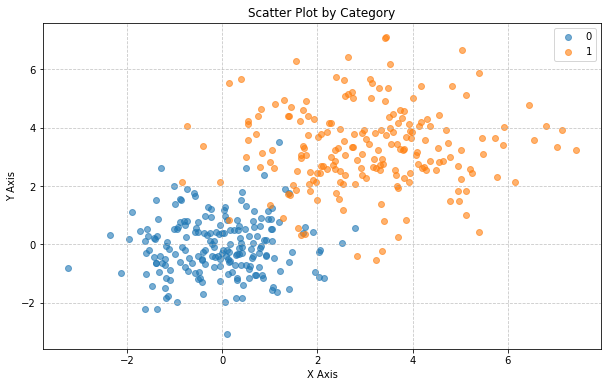

In [2]:
import matplotlib.pyplot as plt
x = df.iloc[:, 0]  # 第一列（x轴数据）
y = df.iloc[:, 1]  # 第二列（y轴数据）
categories = df.iloc[:, 2]  # 第三列（分类数据）
# 创建散点图
plt.figure(figsize=(10, 6))

unique_categories = categories.unique()
for category in unique_categories:
    mask = categories == category
    plt.scatter(x[mask], y[mask], label=category, alpha=0.6)

plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Scatter Plot by Category')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [3]:
import numpy as np
random_indices = np.random.permutation(df.index)
df_shuffled = df.iloc[random_indices]

# 3. 计算分割点
train_size = int(0.7 * len(df_shuffled))  # 70% 用于训练
test_size = len(df_shuffled) - train_size  # 剩余30% 用于测试

# 4. 分割数据集
train_data = df_shuffled.iloc[:train_size]  # 前70%
test_data = df_shuffled.iloc[train_size:]   # 后30%

# 5. 检查分割结果（可选）
print("训练集大小：", len(train_data))
print("测试集大小：", len(test_data))
print("\n训练集前几行：")
print(train_data.head())
print("\n测试集前几行：")
print(test_data.head())

训练集大小： 280
测试集大小： 120

训练集前几行：
            0         1  2
174 -0.792948  0.790702  0
356  3.919052  2.143854  1
388 -0.412652  3.361681  1
289  4.186025  5.417987  1
263  4.481542  2.555752  1

测试集前几行：
            0         1  2
145  0.030299  0.389146  0
253  4.539025  3.321158  1
301  2.076739  3.791789  1
32  -1.361515  0.277799  0
345  2.972508  3.914438  1


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train = train_data.iloc[:, :-1]  # 所有列除了最后一列
y_train = train_data.iloc[:, -1]   # 最后一列（标签）
X_test = test_data.iloc[:, :-1]    # 测试集特征
y_test = test_data.iloc[:, -1]     # 测试集标签

# 5. 构建 k-NN 分类器 (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 6. 预测训练集和测试集
train_predictions = knn.predict(X_train)
test_predictions = knn.predict(X_test)

# 7. 计算准确率和误分类率
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

train_loss = 1 - train_accuracy  # 训练集误分类率
test_loss = 1 - test_accuracy    # 测试集误分类率

# 8. 输出结果
print(f"训练集大小: {len(X_train)} 样本")
print(f"测试集大小: {len(X_test)} 样本")
print(f"训练集准确率: {train_accuracy:.4f}")
print(f"训练集误分类率: {train_loss:.4f}")
print(f"测试集准确率: {test_accuracy:.4f}")
print(f"测试集误分类率: {test_loss:.4f}")

训练集大小: 280 样本
测试集大小: 120 样本
训练集准确率: 0.9679
训练集误分类率: 0.0321
测试集准确率: 0.9833
测试集误分类率: 0.0167


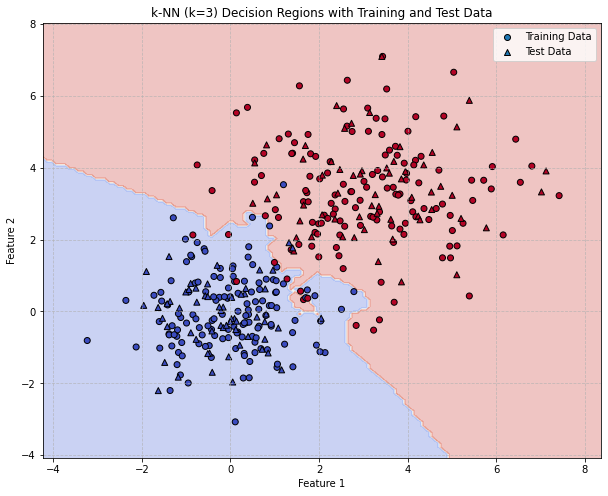

In [5]:
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# 7. 预测网格点的分类
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 8. 绘制决策区域和数据点
plt.figure(figsize=(10, 8))

# 绘制决策区域
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# 绘制训练集数据点
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, 
            marker='o', edgecolor='k', label='Training Data', cmap='coolwarm')

# 绘制测试集数据点
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, 
            marker='^', edgecolor='k', label='Test Data', cmap='coolwarm')

# 添加图表元素
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('k-NN (k=3) Decision Regions with Training and Test Data')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [13]:
data2 = r"D:\下巴分你一半\研究生文件\学习\S1\Machine Learning\pra\pra1\w3regr.csv"   #文件路径
df2 = pd.read_csv(data2, header=None)  #读取文件
print(df2) 

      0           1
0  -5.0  123.867799
1  -4.9   63.138296
2  -4.8    4.163196
3  -4.7   -0.163918
4  -4.6  -33.727488
..  ...         ...
76  2.6  -86.646433
77  2.7  -90.548948
78  2.8  -95.476761
79  2.9 -106.979447
80  3.0 -136.873070

[81 rows x 2 columns]


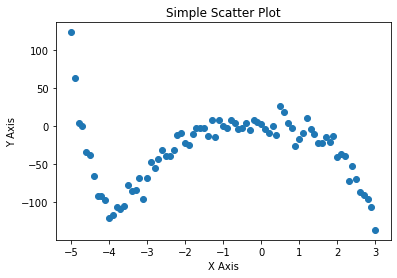

In [14]:
x = df2.iloc[:, 0]  # 第一列（x轴数据）
y = df2.iloc[:, 1]
plt.scatter(x, y)

# 添加标签和标题
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Simple Scatter Plot')

# 显示图形
plt.show()

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

random_indices = np.random.permutation(df2.index)
df2_shuffled = df2.iloc[random_indices]

# 3. 分割为训练集 (70%) 和测试集 (30%)
train_size = int(0.7 * len(df2_shuffled))
train_data = df2_shuffled.iloc[:train_size]
test_data = df2_shuffled.iloc[train_size:]

# 4. 分离特征和目标值
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

# 5. 特征标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. 构建 k-NN 回归模型，尝试不同 k 值
for k in [3, 5, 7]:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train_scaled, y_train)

    # 7. 预测
    train_predictions = knn_reg.predict(X_train_scaled)
    test_predictions = knn_reg.predict(X_test_scaled)

    # 8. 计算 SSE
    train_sse = np.sum((y_train - train_predictions) ** 2)
    test_sse = np.sum((y_test - test_predictions) ** 2)

    # 9. 计算 MSE
    train_mse = train_sse / len(y_train)
    test_mse = test_sse / len(y_test)

    # 10. 输出结果
    print(f"\nk = {k}:")
    print(f"训练集大小: {len(X_train)} 样本")
    print(f"测试集大小: {len(X_test)} 样本")
    print(f"训练集平方误差和 (SSE): {train_sse:.4f}")
    print(f"测试集平方误差和 (SSE): {test_sse:.4f}")
    print(f"训练集均方误差 (MSE): {train_mse:.4f}")
    print(f"测试集均方误差 (MSE): {test_mse:.4f}")


k = 3:
训练集大小: 56 样本
测试集大小: 25 样本
训练集平方误差和 (SSE): 11283.8153
测试集平方误差和 (SSE): 5394.4275
训练集均方误差 (MSE): 201.4967
测试集均方误差 (MSE): 215.7771

k = 5:
训练集大小: 56 样本
测试集大小: 25 样本
训练集平方误差和 (SSE): 19676.8315
测试集平方误差和 (SSE): 8745.9808
训练集均方误差 (MSE): 351.3720
测试集均方误差 (MSE): 349.8392

k = 7:
训练集大小: 56 样本
测试集大小: 25 样本
训练集平方误差和 (SSE): 29402.0442
测试集平方误差和 (SSE): 14742.2239
训练集均方误差 (MSE): 525.0365
测试集均方误差 (MSE): 589.6890


D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22238 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24402 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35757 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 32451 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35797 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-package

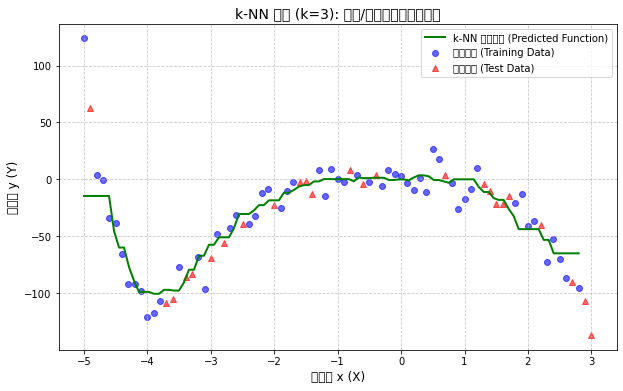

In [16]:
# 9. 绘制训练/测试数据和预测函数
# 生成用于绘制预测函数的点
x_range = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
x_range_scaled = scaler.transform(x_range)
y_pred_range = knn_reg.predict(x_range_scaled)

# 绘制图形
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='训练数据 (Training Data)', alpha=0.6)
plt.scatter(X_test, y_test, color='red', label='测试数据 (Test Data)', marker='^', alpha=0.6)
plt.plot(x_range, y_pred_range, color='green', label='k-NN 预测函数 (Predicted Function)', linewidth=2)
plt.xlabel('自变量 x (X)', fontsize=12)
plt.ylabel('因变量 y (Y)', fontsize=12)
plt.title('k-NN 回归 (k=3): 训练/测试数据和预测函数', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [17]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

random_indices = np.random.permutation(df.index)
df_shuffled = df.iloc[random_indices]

# 3. 分割为训练集 (70%) 和测试集 (30%)
train_size = int(0.7 * len(df_shuffled))
train_data = df_shuffled.iloc[:train_size]
test_data = df_shuffled.iloc[train_size:]

# 4. 分离特征和标签
# 假设最后一列是标签，其余列是特征
X_train = train_data.iloc[:, :-1]  # 所有列除了最后一列
y_train = train_data.iloc[:, -1]   # 最后一列（标签）
X_test = test_data.iloc[:, :-1]    # 测试集特征
y_test = test_data.iloc[:, -1]     # 测试集标签

# 5. 构建决策树分类器
# 使用默认参数（可以根据需要调整，例如 max_depth）
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# 6. 预测训练集和测试集
train_predictions = dt_classifier.predict(X_train)
test_predictions = dt_classifier.predict(X_test)

# 7. 计算准确率和误分类率
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

train_loss = 1 - train_accuracy  # 训练集误分类率
test_loss = 1 - test_accuracy    # 测试集误分类率

# 8. 输出结果
print(f"训练集大小: {len(X_train)} 样本")
print(f"测试集大小: {len(X_test)} 样本")
print(f"训练集准确率: {train_accuracy:.4f}")
print(f"训练集误分类率: {train_loss:.4f}")
print(f"测试集准确率: {test_accuracy:.4f}")
print(f"测试集误分类率: {test_loss:.4f}")

训练集大小: 280 样本
测试集大小: 120 样本
训练集准确率: 1.0000
训练集误分类率: 0.0000
测试集准确率: 0.9167
测试集误分类率: 0.0833


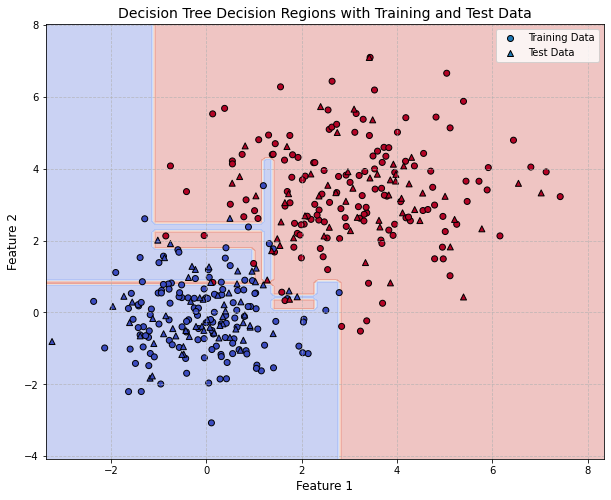

In [18]:
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# 7. 预测网格点的分类
Z = dt_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 8. 绘制决策区域和数据点
plt.figure(figsize=(10, 8))

# 绘制决策区域
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# 绘制训练集数据点
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, 
            marker='o', edgecolor='k', label='Training Data', cmap='coolwarm')

# 绘制测试集数据点
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, 
            marker='^', edgecolor='k', label='Test Data', cmap='coolwarm')

# 添加图表元素
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Decision Tree Decision Regions with Training and Test Data', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

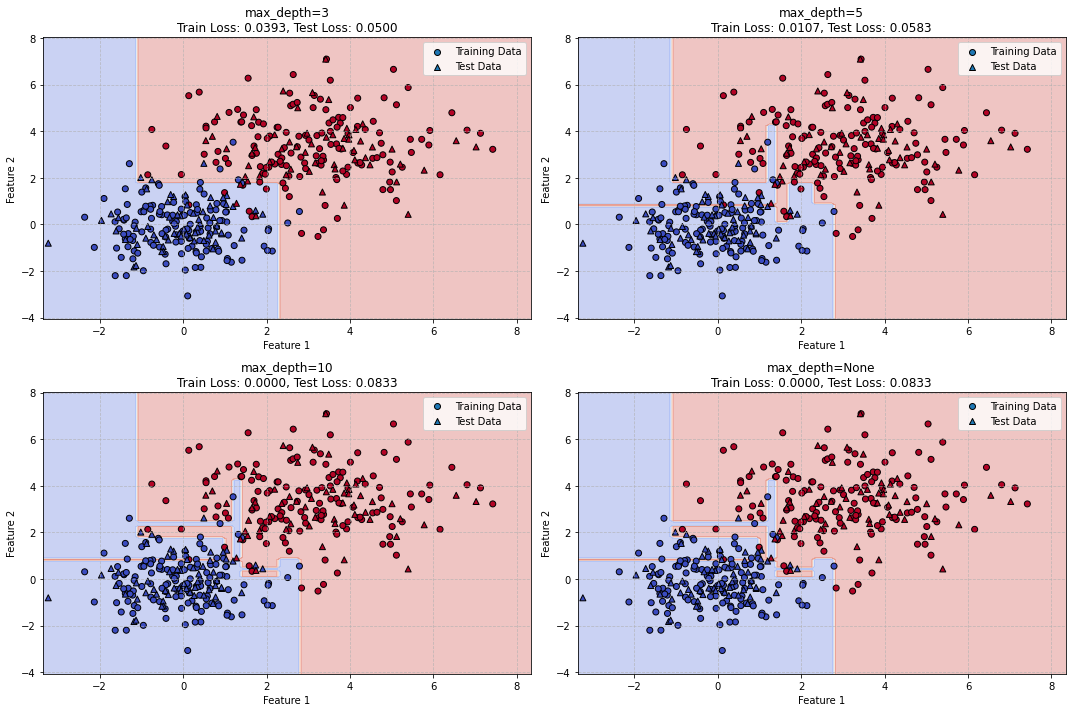

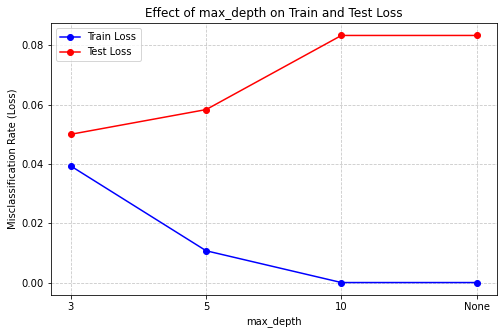

max_depth 值与损失的关系:
max_depth=3: 训练集误分类率=0.0393, 测试集误分类率=0.0500
max_depth=5: 训练集误分类率=0.0107, 测试集误分类率=0.0583
max_depth=10: 训练集误分类率=0.0000, 测试集误分类率=0.0833
max_depth=None: 训练集误分类率=0.0000, 测试集误分类率=0.0833


In [19]:
X_train = train_data.iloc[:, :2]  # 前两列作为特征
y_train = train_data.iloc[:, -1]  # 最后一列作为标签
X_test = test_data.iloc[:, :2]    # 测试集前两列特征
y_test = test_data.iloc[:, -1]    # 测试集标签

# 5. 实验不同的 max_depth 值
max_depth_values = [3, 5, 10, None]  # None 表示不限制深度
train_losses = []
test_losses = []

# 创建网格以绘制决策区域
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# 6. 循环实验不同 max_depth 值
plt.figure(figsize=(15, 10))

for i, max_depth in enumerate(max_depth_values, 1):
    # 构建决策树分类器
    dt_classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt_classifier.fit(X_train, y_train)

    # 预测训练集和测试集
    train_pred = dt_classifier.predict(X_train)
    test_pred = dt_classifier.predict(X_test)

    # 计算误分类率
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    train_loss = 1 - train_accuracy
    test_loss = 1 - test_accuracy

    train_losses.append(train_loss)
    test_losses.append(test_loss)

    # 预测网格点的分类
    Z = dt_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 绘制子图
    plt.subplot(2, 2, i)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, 
                marker='o', edgecolor='k', label='Training Data', cmap='coolwarm')
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, 
                marker='^', edgecolor='k', label='Test Data', cmap='coolwarm')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'max_depth={max_depth}\nTrain Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 7. 绘制损失随 max_depth 变化的折线图
plt.figure(figsize=(8, 5))
plt.plot([str(md) for md in max_depth_values], train_losses, marker='o', label='Train Loss', color='blue')
plt.plot([str(md) for md in max_depth_values], test_losses, marker='o', label='Test Loss', color='red')
plt.xlabel('max_depth')
plt.ylabel('Misclassification Rate (Loss)')
plt.title('Effect of max_depth on Train and Test Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 8. 输出所有 max_depth 的损失值
print("max_depth 值与损失的关系:")
for md, train_loss, test_loss in zip(max_depth_values, train_losses, test_losses):
    print(f"max_depth={md}: 训练集误分类率={train_loss:.4f}, 测试集误分类率={test_loss:.4f}")

In [28]:
data2 = r"D:\下巴分你一半\研究生文件\学习\S1\Machine Learning\pra\pra1\w3regr.csv"   #文件路径
df2 = pd.read_csv(data2, header=None)  #读取文件
print(df2) 

      0           1
0  -5.0  123.867799
1  -4.9   63.138296
2  -4.8    4.163196
3  -4.7   -0.163918
4  -4.6  -33.727488
..  ...         ...
76  2.6  -86.646433
77  2.7  -90.548948
78  2.8  -95.476761
79  2.9 -106.979447
80  3.0 -136.873070

[81 rows x 2 columns]


In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# 2. Split into features (X) and target variable (y)
X = df2.iloc[:, :-1]  # All columns except the last one (features)
y = df2.iloc[:, -1]   # Last column (target)

# 3. Split into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Train Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=5, random_state=42)  # 限制树深度为 5
model.fit(X_train, y_train)

# 5. Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 6. Compute Sum of Squared Errors (SSE)
sse_train = np.sum((y_train - y_train_pred) ** 2)
sse_test = np.sum((y_test - y_test_pred) ** 2)

print(f"Training SSE: {sse_train:.4f}")
print(f"Test SSE: {sse_test:.4f}")

Training SSE: 4485.9004
Test SSE: 10796.4424


In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

data3 = r"D:\下巴分你一半\研究生文件\学习\S1\Machine Learning\pra\pra1\w3regr.csv"   #文件路径
df3 = pd.read_csv(data3, header=None, names=["Feature","Target"])  #读取文件
X = df3[["Feature"]]  # 需要保证 X 是 DataFrame 而不是 Series
y = df3["Target"]

# 3. 划分训练集和测试集 (70% 训练, 30% 测试)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. 定义 XGBoost 回归模型
xgb_model = XGBRegressor(
    n_estimators=500,  # 增加树的数量，让模型学习更充分
    learning_rate=0.01,  # 降低学习率，让训练更稳定
    max_depth=7,  # 适当增加树深度
    subsample=0.7,  # 防止过拟合
    colsample_bytree=0.7,
    random_state=42
)
# 5. 训练模型
xgb_model.fit(X_train, y_train)

# 6. 预测
train_preds = xgb_model.predict(X_train)
test_preds = xgb_model.predict(X_test)

# 7. 计算 SSE（误差平方和）
train_sse = np.sum((train_preds - y_train) ** 2)
test_sse = np.sum((test_preds - y_test) ** 2)

# 8. 输出 SSE
print(f"Training SSE: {train_sse:.4f}")
print(f"Test SSE: {test_sse:.4f}")

Training SSE: 1083.4556
Test SSE: 12956.4518


In [38]:
from sklearn.model_selection import cross_val_score

xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=2, subsample=0.7, colsample_bytree=0.7, random_state=42)
cv_scores = cross_val_score(xgb_model, X, y, scoring="neg_mean_squared_error", cv=5)

print("Cross-Validation MSE:", -np.mean(cv_scores))

Cross-Validation MSE: 2262.7450736254
